## Ch0. 感知机

### 1. 神经元与感知机

#### 1.1 生物神经元

20世纪初，生物学家发现了生物神经元的结构。一个生物神经元通常由多个树突、一个轴突与细胞体组成。属兔用来接收信息，轴突用来发送信息。当神经元所接收的信号累积超过某一个阈值时，神经元的胞体会处于兴奋状态，产生电信号脉冲。轴突末端有许多末梢——突触与其他神经元的树突产生链接，并将胞体产生的电脉冲信号传递给其他神经元。
<img src="./assets/神经元结构示意图.jpg" title="生物神经元" width="0.5">
一个神经元细胞，可以看作是一个只有两种状态的细胞：兴奋与抑制，神经元的状态取决于从其他的神经元获得的输入信号量，以及突出的强度（抑制 or 加强）。

#### 1.2 人工神经元

人工神经元是根据生物神经元的结构所提出的一种模拟生物神经元的结构与特性的算法，其接受一组信号并产生相应的输出。在这里感知机或者人工神经元或者朴素感知机算法是美国学者Frank Rosenblatt于1957年提出的，是构成神经网络的基本单元。

一个典型的神经元的数学表达形式为：

$$
    z = \sum_{d=1}^D w_d x_d + b \tag{0.1} \\
    a = f(z) \tag{0.2}
$$

其中$x_d, d = 1, 2, 3, ..., D$为神经云接受的D个输入，$z \in \Bbb R$为神经元所获得的信号的加权和，非线性函数$f(·)$表示神经元的激活函数，$a$表示神经元的激活值（Activation）。

我们可以令向量$\vec{x} = \begin{bmatrix} x_1 & x_2 & ... & x_D  \end{bmatrix}$表示这一组输入，向量$\vec{w} = \begin{bmatrix} w_1 & w_2 & ... & w_D  \end{bmatrix}$表示$D$维的权重向量，$b \in \Bbb R$为偏置，从而得到人工神经元的一个矩阵表示：

$$
    z = \vec{w}^T \vec{x} + b \tag{0.3} \\
    a = f(z) \tag{0.4} 
$$

这个典型的人工神经元的结构如图所示：
<img src="./assets/典型的人工神经元结构.png" title="人工神经元" width="0.5">

在人工神经元中，每个输入信号的权重控制着各个输入信号的重要性，权重越大，对应该权重的信号的重要性就越高；而偏置则可以看作是神经元被激活的一个阈值，只有当输入信号的加权总和超过了这个阈值时，才会输出对应的激活值。

#### 1.3 简单感知机

接下来我们考虑一个非常简单的感知机，这个感知机只接受两个输入信号。本章所提到的感知机的激活函数为值为0或1的一个阶跃函数。用数学公式来表示这个感知机我们可以得到式$\tag{0.5}$：

$$
    f(z)= \begin{cases} 0, & (w_1x_1 + w_2x_2 \leq -b) \\\\ 1, & (w_1x_1 + w_2x_2 > -b) \end{cases} \tag{0.5}
$$

其中$$z = \sum_{i=1}^2 w_ix_i + b$$，这就是简单感知机的运行原理。我们构建的简单感知机的结构就如下图所示：
<img src="./assets/简单感知机的结构.png" title="简单感知机的结构" width="0.5">

### 2. 简单逻辑电路感知机的实现
我们可以使用简单的多层感知机来实现简单的逻辑电路——与门、或门、与非门。简单逻辑电路都是有两个输入与一个输出的门电路，对应的我们也可以使用拥有两个输入与一个输出的感知机来实现。
####  2.1 简单逻辑电路

##### 2.1.1 与门
AND gate，是指当两个输入同时为1时，输出的和才为1的门电路。与门的真值表如下所示：

| $x_1$       | $x_2$       | $y$           |
| :---:       |    :----:   |         :---: |
| 0           | 0           | 0             |
| 1           | 0           | 0             |
| 0           | 1           | 0             |
| 1           | 1           | 1             |

##### 2.1.2 或门
OR gate，是指只要有一个输入信号为1，那么输出就为1的门电路。或门的真值表如下所示：

| $x_1$       | $x_2$       | $y$ |
| :---:       |    :----:   |:---:|
| 0           | 0           |  0  |
| 1           | 0           |  1  |
| 0           | 1           |  1  |
| 1           | 1           |  1  |

##### 2.1.3 与非门
NAND gate，就是输出与AND gate相反的门电路，它颠倒了与门的输出，即但两个输入信号同时为1时输出0，其余的时刻都输出1.

| $x_1$       | $x_2$       | $y$ |
| :---:       |    :----:   |:---:|
| 0           | 0           |  1  |
| 1           | 0           |  1  |
| 0           | 1           |  1  |
| 1           | 1           |  0  |

#### 2.2 感知机的实现
接下来，我们考虑使用感知机来实现简单逻辑电路。使用感知机来实现简单逻辑电路，就是要考虑寻找使门电路成立的感知机的参数$(w_1, w_2, b)$的值。我们可以将只有两个输入的感知机看作是一条直线，它将二维平面分割成两个空间，一个空间输出1，另一个空间输出0。而逻辑电路的输入可以看作是坐标轴上的点：$(0, 0)、(1, 0)、(0, 1)、(1, 1)$，用感知机来实现逻辑门电路，就是要找到这样的一条直线，可以将这些点划分到正确的类别中去(0, 1)。

##### 2.2.1 AND gate的实现
对于与门来说，就是要找到这样的一条直线，能够把$(0, 0)、(1, 0)、(0, 1))$划分为0，把$(1, 1)$划分为1。我们人工的考虑一下可以知道，满足与门的条件的参数选择有无数个，当$(w_1, w_2, b)$为$(0.5, 0.5, 0.7)$、$(1.0, 1.0, 1.0)$等时都成立，均满足与门的条件。

首先，为了方便观察，我们实现一个可视化函数。

In [123]:
import numpy as np
import matplotlib.pyplot as plt


def visualization(X, y, weights, title='Perceptron Visualization'):
    plt.figure(figsize=(6, 6))

    for xi, yi in zip(X, y):
        if yi == 1:
            plt.scatter(xi[0], xi[1], color='blue',
                        label='y=1' if 'y=1' not in plt.gca().get_legend_handles_labels()[1] else "")
        else:
            plt.scatter(xi[0], xi[1], color='red',
                        label='y=0' if 'y=0' not in plt.gca().get_legend_handles_labels()[1] else "")

    x1 = np.linspace(-0.1, 2, 1000)
    x2 = (-weights[0] * x1 + weights[2]) / weights[1]
    plt.plot(x1, x2, color='green', label='Decision Boundary')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

输入真值表与我们人为设定的参数。

In [124]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 0, 0, 1])

weights = [0.5, 0.5, 0.8]

可视化分类边界。

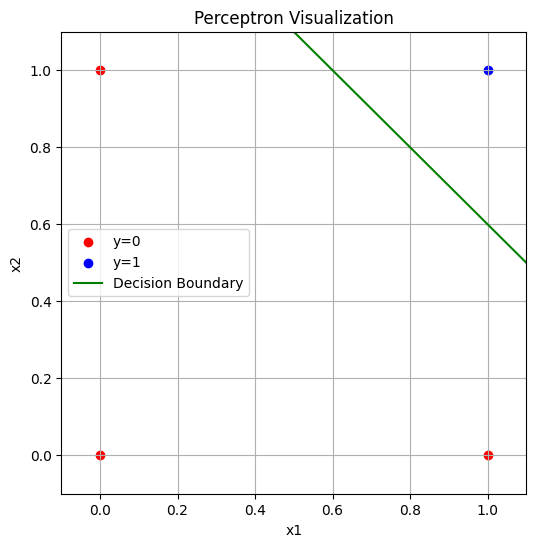

In [125]:
visualization(X, y, weights)

##### 2.2.2 或门的实现

对于与门来说，就是要找到这样的一条直线，能够把$(0, 0)、(1, 0)、(0, 1)$划分为0，把$(1, 1)、(1, 0)、(0, 1)$划分为1。我们人工的考虑一下可以知道，满足与门的条件的参数选择也有无数个，当$(w_1, w_2, b)$为$(2.0, 2.0, 1.0)等时都成立，均满足或门的条件。

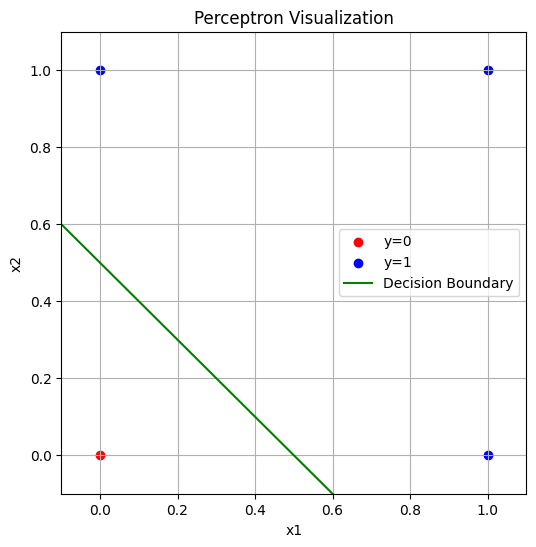

In [126]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])

weights = [2, 2, 1]

visualization(X, y, weights)

##### 2.2.3 与非门的实现

对于与门来说，同样的是要找到这样的一条直线，能够把$(1, 1)$划分为0，把$(0, 0)、(1, 0)、(0, 1)$划分为1。我们人工的考虑一下可以知道，满足与门的条件的参数选择也有无数个，当$(w_1, w_2, b)$为$(-0.5, -0.5, -0.7)等时都成立，均满足或门的条件。

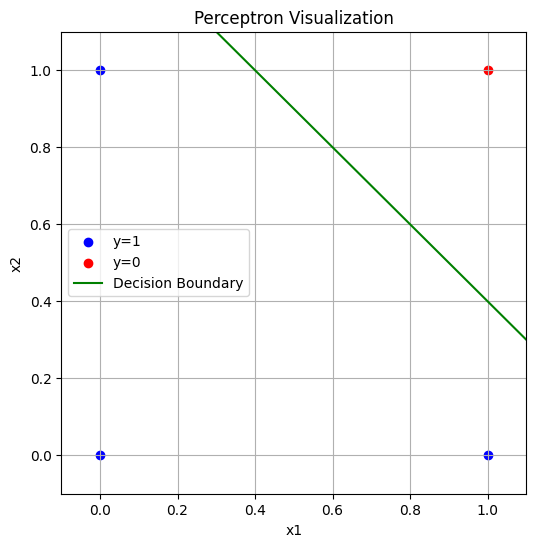

In [127]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([1, 1, 1, 0])

weights = [-0.5, -0.5, -0.7]

visualization(X, y, weights)

#### 2.3 感知机的实现

我们可以使用式$\tag{0.6}$来描述感知机的行为：

$$
    f(z)= \begin{cases} 0, & (w_1x_1 + w_2x_2 + b \leq 0) \\\\ 1, & (w_1x_1 + w_2x_2 +b > 0) \end{cases} \tag{0.6}
$$

我们使用Numpy来实现这个过程：
首先定义一个简单感知机的模型。

In [128]:
class SimplePerceptron:
    def __init__(self, w):
        self.weight = w[:2]
        self.bias = -w[2]

    def jump_func(self, z):
        return np.where(z > 0, 1, 0)

    def model(self, x):
        z = np.dot(x, self.weight) + self.bias
        return self.jump_func(z)


与门的实现

In [129]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
and_gate = SimplePerceptron([1, 1, 1])
and_gate.model(X)

array([0, 0, 0, 1])

或门的实现

In [130]:
or_gate = SimplePerceptron([2, 2, 1])
or_gate.model(X)

array([0, 1, 1, 1])

与非门的实现

In [131]:
nand_gate = SimplePerceptron([-1, -1, -1])
nand_gate.model(X)

array([1, 0, 0, 0])

更进一步的，为了避免人为的寻找参数，我们可以实现一个训练函数，通过机器学习的方法来自动的为我们搜索简单感知机的参数

In [132]:
def train(perceptron, X, y, learning_rate=0.1, epochs=1000):
    for epoch in range(epochs):
        for xi, yi in zip(X, y):
            prediction = perceptron.model(xi)
            error = yi - prediction

            perceptron.weight += learning_rate * error * xi
            perceptron.bias += learning_rate * error

        print(f"Epoch {epoch + 1}/{epochs}: "
              f"Weight={perceptron.weight}, Bias={perceptron.bias}")
    return perceptron

简单感知机的训练：

In [133]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([1, 1, 1, 0])

nand_gate = SimplePerceptron([1, 1, 1])
nand_gate.model(X)

array([0, 0, 0, 1])

In [134]:
train(nand_gate, X, y)
nand_gate.model(X)

Epoch 1/1000: Weight=[0.9 0.9], Bias=-1.0
Epoch 2/1000: Weight=[0.8 0.9], Bias=-0.9
Epoch 3/1000: Weight=[0.8 0.8], Bias=-0.8
Epoch 4/1000: Weight=[0.7 0.7], Bias=-0.8
Epoch 5/1000: Weight=[0.6 0.7], Bias=-0.7000000000000001
Epoch 6/1000: Weight=[0.6 0.6], Bias=-0.6000000000000001
Epoch 7/1000: Weight=[0.5 0.5], Bias=-0.6000000000000001
Epoch 8/1000: Weight=[0.4 0.5], Bias=-0.5000000000000001
Epoch 9/1000: Weight=[0.4 0.4], Bias=-0.40000000000000013
Epoch 10/1000: Weight=[0.3 0.3], Bias=-0.40000000000000013
Epoch 11/1000: Weight=[0.2 0.3], Bias=-0.30000000000000016
Epoch 12/1000: Weight=[0.2 0.2], Bias=-0.20000000000000015
Epoch 13/1000: Weight=[0.1 0.1], Bias=-0.20000000000000015
Epoch 14/1000: Weight=[1.38777878e-16 1.00000000e-01], Bias=-0.10000000000000014
Epoch 15/1000: Weight=[1.38777878e-16 1.38777878e-16], Bias=-1.3877787807814457e-16
Epoch 16/1000: Weight=[-0.1 -0.1], Bias=-1.3877787807814457e-16
Epoch 17/1000: Weight=[-0.2 -0.1], Bias=0.09999999999999987
Epoch 18/1000: Weight

array([1, 1, 1, 0])

### 3 异或门与感知机的局限
单层感知机可以实现简单的逻辑门电路，但是它无法表示异或门（XOR gate）
#### 3.1 异或门
异或门也被称为逻辑异或电路，及当且仅当门的两个输入信号中的一方为1的时候，才会输出1，（异或也可以解释为“拒绝其他”的意思）。异或门的真值表如下所示：

| $x_1$       | $x_2$       | $y$ |
| :---:       |    :----:   |:---:|
| 0           | 0           |  0  |
| 1           | 0           |  1  |
| 0           | 1           |  1  |
| 1           | 1           |  0  |

由前所知，感知机式先行分割我们的输入空间的，它无法做到满足异或门的分类条件。因为异或门不能使用冼星海书就将坐标系中的四个点分割开来。

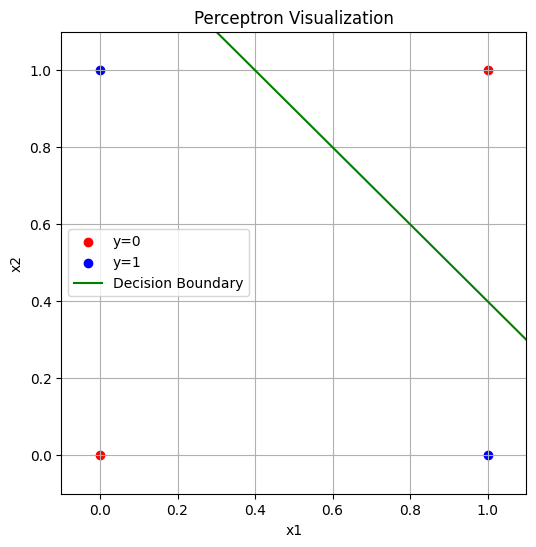

In [135]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])

visualization(X, y, [-0.5, -0.5, -0.7])

#### 3.2 linear与non-linear

感知机的局限性就在于它只能表示有一条直线分割的空间，他无法表示一条曲线。在机器学习中，我们将由直线分割的空间称为线性空间，将由曲线分割而成的空间称为非线性空间。虽然简单感知机无法表示直线空间，但是它可以通过“叠加层”的方式来对一个曲线空间进行表示。

### 4. 多层感知机

#### 4.1 已有门电路组合实现异或门
在现实中，我们可以通过组合已有的简单门电路的方式来构建一个异或门。我们可以通过如图所示的配置来实现，其中$x_1, x_2$表示输入信号，$y$表示输出信号。
<img src="./assets/异或门结构.png" title="异或门结构" width="0.5">

我们可以得到如下的真值表：


| $x_1$ | $x_2$ | $s_1$ | $s_2$ | $y$ |
|-------|-------|-------|-------|-----|
| 0     | 0     | 1     | 0     | 0   |
| 1     | 0     | 1     | 1     | 1   |
| 0     | 1     | 1     | 1     | 1   |
| 1     | 1     | 0     | 1     | 0   |

发现其确实符合XOR gate的输出。
#### 4.2 多层感知机实现异或门

按照上面的思路，我们可以通过通过叠加已经实现的简单的逻辑电路，来实现异或门。我们实现的异或门的结构如下所示：
<img src="./assets/XOR多层感知机.png" title="XOR多层感知机" width="0.5">

In [136]:
and_gate = SimplePerceptron([1, 1, 1])
or_gate = SimplePerceptron([0.5, 0.5, 0.2])
nand_gate = SimplePerceptron([-0.5, -0.5, -0.8])


def xor_gate(x):
    s1 = nand_gate.model(x)
    s2 = or_gate.model(x)
    return and_gate.model(np.array([s1, s2]).T)

In [137]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 0])

xor_gate(X)

array([0, 1, 1, 0])

异或门是一种多层结构的神经网络。我们可以将最左边的一层称为第0层（输入层），中间的一层称为第1层（隐藏层），最后的一层称为第2层（输出层）。实际上与门、或门、与非门是单层感知机，叠加了多层的感知机就称为多层感知机。我们通过叠加层（加深层），就能通过感知机进行更灵活地表示。

### 5. 多层感知机与计算机

多层感知机可以实现比之前见到的电路更复杂的电路。比如，进行加法运算的加法器也可以用感知机实现。此外，将二进制转换为十进制的编码器、满足某些条件就输出1的电路（用于等价检验的电路）等也可以用感知机表示。实际上只需要通过与非门的组合，就能再现计算机进行的处理。说明使用感知机也可以表示计算机。理论上可以说2层感知机就能构建计算机。这是因为，2层感知机（严格地说是激活函数使用了非线性的sigmoid函数的感知机，可以表示任意函数。

### 6. 总结 

本章我们向大家介绍了神经网络的基础部件——感知机，他是组成神经网络的基础部件。感知机式激活函数为0-1阶跃函数的人工神经元，通过简单的组合我们可以利用感知机实现简单的逻辑电路。但是对于异或门，无法通过单层感知机进行表示，因为单层感知机只能分割线性空间，而异或门需要非线性的表示。我们可以利用多层感知机来进行异或门的表示，可以通过增加感知机的层数来实现更灵活的表示。